In [6]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso # tipi di regressione lineare con alcune differenze

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [7]:
df=pd.read_csv("../../prepared_ravdess_features.csv")
df_copy=df.copy()
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [8]:
df_copy=df.copy()

cat_var=["vocal_channel","emotional_intensity","statement","repetition","sex"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy[i]=le.fit_transform(df_copy[i])

# one-hot encoding of categorical feature "emotion"
categorical_col = ["emotion"]

df_copy = pd.get_dummies(df_copy, columns=categorical_col)
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,0,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,1,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,0,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,1,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [9]:
matrix = df_copy.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)
matrix

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
vocal_channel,1.000000,0.010564,0.005664,-0.008864,-0.028086,0.021491,-0.724771,-0.133524,-0.036652,0.263475,-0.179433,0.256152,0.486255,0.125154,0.043150,0.112402,-0.221502,-0.535351,0.455390,-0.385434,0.190507,0.123545,-0.481279,-0.025346,-0.123588,0.021518,-0.026629,0.493606,-0.029126,-0.066370,-0.063991,0.227667,-0.060154,-0.051150,-0.042327,-0.067258,0.226377
emotional_intensity,0.010564,1.000000,-0.003263,-0.001855,0.000936,-0.046242,0.113696,0.258318,0.306288,-0.418028,0.404280,-0.213073,-0.116930,-0.255447,0.077697,-0.090612,0.234734,0.197461,-0.080533,0.031869,-0.086555,0.003036,0.106294,-0.017443,0.400490,-0.417672,0.418561,0.036842,0.125542,0.032179,0.032179,0.022305,0.034685,0.035692,-0.267647,0.030086,0.022179
statement,0.005664,-0.003263,1.000000,0.003706,0.000303,-0.000310,0.031776,-0.158588,0.020820,0.019408,-0.007648,-0.004994,-0.083150,-0.075253,-0.012568,0.007080,0.077408,0.078500,-0.003404,-0.055830,-0.004006,0.079617,0.013937,0.000162,-0.022420,0.001656,0.005138,0.167072,0.034535,0.001976,-0.000327,-0.001823,-0.000354,0.000817,-0.001792,-0.000354,0.001262
repetition,-0.008864,-0.001855,0.003706,1.000000,0.000362,0.016484,0.014955,0.017656,0.012175,-0.016747,0.011332,0.000170,-0.010418,-0.013788,0.010440,-0.006180,0.004651,0.009546,-0.011636,0.006011,0.005676,-0.006360,0.014093,-0.002451,0.016288,-0.006195,0.005113,-0.028980,-0.006770,-0.003531,0.001076,-0.000851,0.001058,0.002222,0.002269,0.001058,-0.003921
sex,-0.028086,0.000936,0.000303,0.000362,1.000000,-0.000888,-0.072395,-0.387442,0.541439,0.107485,-0.124847,0.546225,-0.041840,-0.102773,0.303422,-0.202701,0.021170,0.007332,0.576097,-0.580464,0.422395,0.131237,-0.463453,0.010574,-0.082454,0.051798,-0.052087,0.118767,-0.123203,0.003977,-0.002934,-0.005227,0.001585,0.000501,-0.002032,0.003878,-0.002122
frame_width,0.021491,-0.046242,-0.000310,0.016484,-0.000888,1.000000,-0.011463,-0.039940,-0.058948,0.056270,-0.045810,0.025257,0.057208,0.063316,-0.038332,0.017673,-0.041743,-0.049037,0.025739,-0.015826,-0.007737,0.009463,-0.030879,0.000408,-0.034905,0.034752,-0.032584,0.024893,0.023266,-0.021141,0.025143,-0.014654,0.001764,0.001942,0.016792,-0.021277,0.016322
length_ms,-0.724771,0.113696,0.031776,0.014955,-0.072395,-0.011463,1.000000,0.331158,0.010239,-0.303271,0.206468,-0.346807,-0.544216,-0.179825,-0.078471,-0.115780,0.291239,0.620021,-0.560935,0.410205,-0.244967,-0.072681,0.601269,0.004942,0.168267,-0.072458,0.073623,-0.459834,0.067558,0.068676,0.222964,-0.073501,-0.092287,-0.007723,-0.045587,0.118408,-0.295023
zero_crossings_sum,-0.133524,0.258318,-0.158588,0.017656,-0.387442,-0.039940,0.331158,1.000000,0.128609,-0.558561,0.500026,-0.448766,-0.071350,-0.372155,0.188889,-0.048420,0.180369,0.135859,-0.405588,0.114070,-0.193627,0.072318,0.444536,0.020661,0.469510,-0.421128,0.417950,-0.115347,0.206164,0.236511,-0.119984,0.093998,0.060604,0.007111,-0.146256,-0.068888,-0.103561
mfcc_mean,-0.036652,0.306288,0.020820,0.012175,0.541439,-0.058948,0.010239,0.128609,1.000000,-0.620039,0.607146,0.174947,-0.281320,-0.593648,0.399432,-0.375971,0.357755,0.252073,0.314997,-0.355717,0.199679,0.020872,-0.187512,0.006264,0.565355,-0.593372,0.584284,0.112754,0.054820,0.334288,-0.227313,-0.024776,0.138271,0.082038,-0.155130,-0.161585,-0.042660
mfcc_std,0.263475,-0.418028,0.019408,-0.016747,0.107485,0.056270,-0.303271,-0.558561,-0.620039,1.000000,-0.976065,0.435928,0.369007,0.523885,-0.131814,0.226164,-0.452195,-0.472652,0.363959,-0.228324,0.280154,0.066374,-0.409975,-0.004166,-0.844735,0.817290,-0.811442,0.109008,-0.363239,-0.411152,0.320360,0.092988,-0.191031,-0.153793,0.194969,0.175337,0.061262


In [16]:
# Normalizzo tutto

df_normalized=df_copy.copy()

to_scale=df_normalized.columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_normalized[to_scale])
df_normalized[to_scale] = scaled_features

df_normalized.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,0.775024,-0.926947,-1.006225,0.997108,-1.017952,-0.049886,-0.592518,1.132800,-1.054578,-0.104956,...,-0.273014,0.709258,-0.423792,-0.423792,-0.293755,2.344635,-0.424471,-0.28874,-0.426506,-0.292090
1,0.775024,-0.926947,-1.006225,-1.002900,-1.017952,-0.049886,-0.313366,0.284316,-0.163058,-0.308801,...,1.263560,0.750999,2.359647,-0.423792,-0.293755,-0.426506,-0.424471,-0.28874,-0.426506,-0.292090
2,0.775024,1.078810,-1.006225,0.997108,-1.017952,-0.049886,0.968729,1.607446,-0.393635,-0.499899,...,-0.957463,0.774066,-0.423792,-0.423792,-0.293755,-0.426506,2.355873,-0.28874,-0.426506,-0.292090
3,0.775024,-0.926947,0.993813,-1.002900,-1.017952,-0.049886,-0.759675,-0.344424,-1.630512,1.120801,...,0.276715,-0.068650,-0.423792,-0.423792,-0.293755,-0.426506,-0.424471,-0.28874,-0.426506,3.423602
4,-1.290283,1.078810,-1.006225,0.997108,-1.017952,-0.049886,0.522420,0.622446,-0.589118,-0.717535,...,-0.563587,1.020535,-0.423792,-0.423792,-0.293755,-0.426506,2.355873,-0.28874,-0.426506,-0.292090


In [17]:
df_train, df_test = train_test_split(df_normalized, test_size=0.3, random_state=100)

l=[x for x in df_normalized.columns if x!="length_ms"]

X_train = df_train[l].values
y_train = df_train["length_ms"].values

X_test = df_test[l].values
y_test = df_test["length_ms"].values

# Linear Regressor

Coefficients: 
 [-3.65962424e-01 -6.36675162e-03  8.88311239e-02  9.20247575e-03
  1.87116748e-01  2.36166156e-02  3.48088536e-01 -5.91022170e-02
  1.66929421e-01  1.85322212e-01 -4.19348197e-02  7.05770055e-02
 -2.65904423e-02 -4.93452328e-02 -5.21827448e-02 -2.09088404e-01
  4.42232058e-01  8.61241045e-01  4.53778659e-01  3.22519093e-02
  1.64300897e-01  7.25413662e-01 -3.04526191e-03 -1.05893434e-01
 -5.81961518e-02 -3.34607499e-02 -8.49087959e-02  3.95919563e-02
 -2.33562315e+11 -2.33562315e+11 -1.75801875e+11 -2.34598920e+11
 -2.33822361e+11 -1.73266315e+11 -2.34598920e+11 -1.74962426e+11]
Intercept: 
 0.0036675927105204982


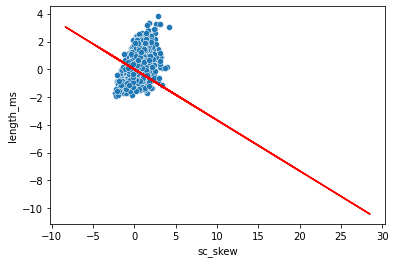

In [26]:
reg = LinearRegression() 
reg.fit(X_train, y_train)

print('Coefficients: \n', reg.coef_) # slope -> inclinazione della linea
print('Intercept: \n', reg.intercept_) # il punto in cui la linea intercetta l'asse y

sns.scatterplot(data=df_train, x="sc_skew", y="length_ms")
plt.plot(X_train, reg.coef_[0]*X_train+reg.intercept_, c="red")

R2: 0.779
MSE: 0.232
MAE: 0.374


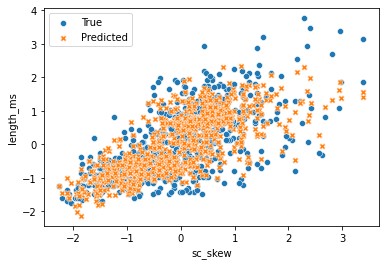

In [25]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_test, x="sc_skew", y="length_ms", label="True")
sns.scatterplot(data=df_test, x="sc_skew", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

# Ridge

Coefficients: 
 [-0.36875721 -0.00611762  0.0878985   0.00900981  0.18575639  0.02410209
  0.34430076 -0.05041709  0.15573824  0.17320416 -0.04135525  0.07516147
 -0.02980684 -0.04894496 -0.05281758 -0.20805342  0.44517166  0.75522624
  0.42671411  0.0338876   0.15605291  0.64051615 -0.00310872 -0.10351122
 -0.05241275 -0.03229016 -0.08394277  0.03890309 -0.00857216  0.15246237
  0.06548591 -0.12777545 -0.06203868 -0.01518731  0.06520958 -0.07604211]
Intercept: 
 0.003557637523110579
R2: 0.779
MSE: 0.232
MAE: 0.374


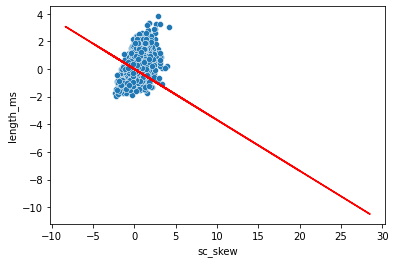

In [30]:
reg = Ridge()
reg.fit(X_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

sns.scatterplot(data=df_train, x="sc_skew", y="length_ms")
plt.plot(X_train, reg.coef_[0]*X_train+reg.intercept_, c="red")

y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))



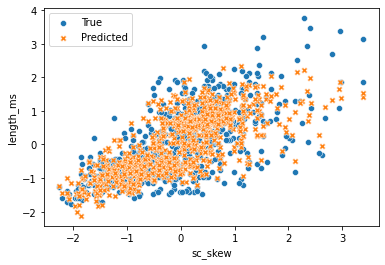

In [31]:
sns.scatterplot(data=df_test, x="sc_skew", y="length_ms", label="True")
sns.scatterplot(data=df_test, x="sc_skew", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

# Lasso

Coefficients: 
 [-0.  0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0.
  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0.]
Intercept: 
 -0.007250011259053476
R2: -0.001
MSE: 1.051
MAE: 0.862


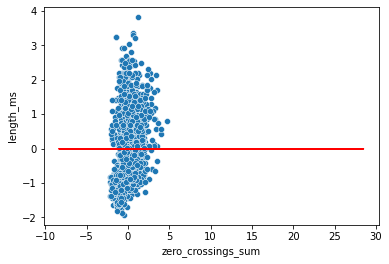

In [32]:
reg = Lasso()
reg.fit(X_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

sns.scatterplot(data=df_train, x="zero_crossings_sum", y="length_ms")
plt.plot(X_train, reg.coef_[0]*X_train+reg.intercept_, c="red")

y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred)) # 
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))


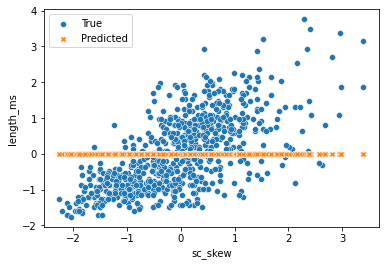

In [33]:
sns.scatterplot(data=df_test, x="sc_skew", y="length_ms", label="True")
sns.scatterplot(data=df_test, x="sc_skew", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

# KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold,KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


param_grid = {
    "n_neighbors": np.arange(3, 30, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsRegressor(),
    param_grid=param_grid,
    cv=KFold(), 
    n_jobs=-1,
    refit=True,
    scoring="r2"
)

grid.fit(X_train, y_train)
print(grid.best_params_, grid.best_score_)

{'metric': 'cityblock', 'n_neighbors': 7, 'weights': 'distance'} 0.7695852440829223


R2: 0.790
MSE: 0.220
MAE: 0.355


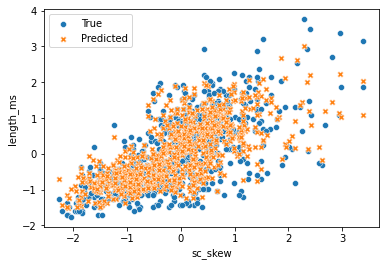

In [42]:
reg = KNeighborsRegressor(metric="cityblock",n_neighbors=7,weights="distance")
reg.fit(X_train,y_train)



y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_test, x="sc_skew", y="length_ms", label="True")
sns.scatterplot(data=df_test, x="sc_skew", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

# DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeRegressor

check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20],
                "criterion": ["squared_error", "absolute_error"] 
                }


grid = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid=check_params,
    cv=KFold(), 
    refit=True,
    scoring="r2"
)

grid.fit(X_train, y_train)
print(grid.best_params_, grid.best_score_)

{'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 10} 0.7008466369326645


R2: 0.687
MSE: 0.329
MAE: 0.434


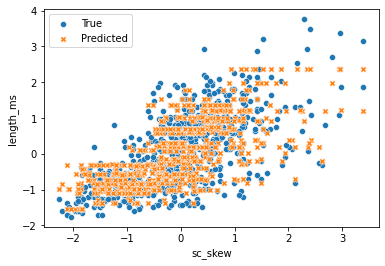

In [43]:
reg = DecisionTreeRegressor(criterion="squared_error",max_depth=None,min_samples_leaf=20,min_samples_split=10)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_test, x="sc_skew", y="length_ms", label="True")
sns.scatterplot(data=df_test, x="sc_skew", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()